In [1]:
import tensorflow as tf
import utils_img_rec as ut
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import pathlib

from operator import itemgetter

### Definindo variaveis

In [2]:
DATA_DIR  = '../_DATA_/image/pickle/cifar10-test-pickle.pickle'
TEST2_DIR = '../_DATA_/image/cifar10/test2'

#DATA_DIR  = '../bases/pickle/imagens/mnist/mnist-test-pickle.pickle'
#TEST2_DIR = '../bases/dados/imagens/teste2/amostra-numerica'

formato = 'jpg'
IMG_SIZE = 32
numero_de_canais = 3

#DATA_DIR = pathlib.Path(DATA_DIR)
#TEST2_DIR = pathlib.Path(TEST2_DIR)

pickle_in = open(DATA_DIR,"rb")
data_train = pickle.load(pickle_in)

model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10-EPOCHS=150 - acc = 0.94693 exec_time - t-train230.0471.h5')
model.summary()
#model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo.h5')

2022-06-26 23:07:35.441734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 23:07:35.453745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 23:07:35.454046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 23:07:35.456538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 23:07:35.456816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 1024)              2769920   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                        

### Definindo categorias

In [3]:
#CATEGORIES = []
CATEGORIES = ut.get_classes(data_train)
CATEGORIES.sort()
try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Preparando dados

In [4]:
def prepare(filepath):
    if numero_de_canais == 1:
        img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    else:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array, new_array.reshape(-1, IMG_SIZE, IMG_SIZE, numero_de_canais)

def plot_image(prediction_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(prediction_array)        
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Classe - {} | {:2.0f}% (true class {})".format(CATEGORIES[predicted_label], 100*np.max(prediction_array), CATEGORIES[true_label]), color=color)

def plot_value_array(prediction_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(CATEGORIES)), prediction_array, color= "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    print(CATEGORIES[true_label])
    thisplot[true_label].set_color('green')

2022-06-26 23:07:37.896067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8301


1/1 [==============================] - 2s 2s/step


2022-06-26 23:07:38.651443: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


airplane


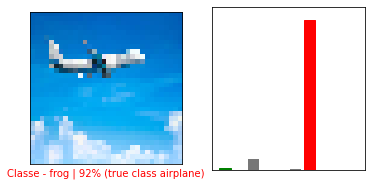

Classe - frog        | Confiança - 91.996
Classe - bird        | Confiança - 6.606
Classe - airplane    | Confiança - 1.034
Classe - dog         | Confiança - 0.171
Classe - automobile  | Confiança - 0.092
Classe - deer        | Confiança - 0.058
Classe - cat         | Confiança - 0.043
Classe - horse       | Confiança - 0.001
Classe - ship        | Confiança - 0.0  
Classe - truck       | Confiança - 0.0  
1/1 [==============================] - 0s 61ms/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
__________________________________________________________

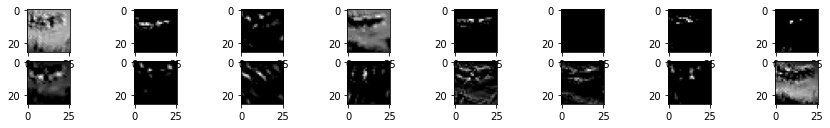




1/1 [==============================] - 0s 28ms/step
automobile


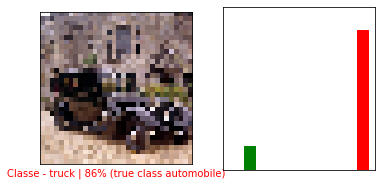

Classe - truck       | Confiança - 85.613
Classe - automobile  | Confiança - 14.384
Classe - frog        | Confiança - 0.002
Classe - ship        | Confiança - 0.001
Classe - airplane    | Confiança - 0.0  
Classe - bird        | Confiança - 0.0  
Classe - cat         | Confiança - 0.0  
Classe - deer        | Confiança - 0.0  
Classe - dog         | Confiança - 0.0  
Classe - horse       | Confiança - 0.0  
1/1 [==============================] - 0s 60ms/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
_______________________________________________________

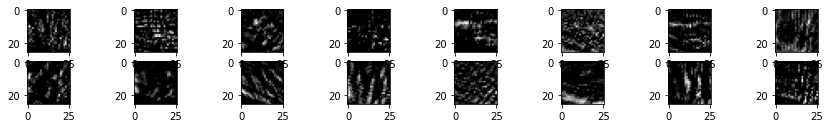




1/1 [==============================] - 0s 29ms/step
bird


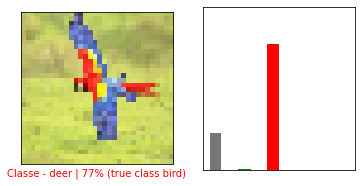

Classe - deer        | Confiança - 77.035
Classe - airplane    | Confiança - 22.593
Classe - bird        | Confiança - 0.37 
Classe - ship        | Confiança - 0.001
Classe - automobile  | Confiança - 0.0  
Classe - cat         | Confiança - 0.0  
Classe - dog         | Confiança - 0.0  
Classe - frog        | Confiança - 0.0  
Classe - horse       | Confiança - 0.0  
Classe - truck       | Confiança - 0.0  
1/1 [==============================] - 0s 61ms/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
_______________________________________________________

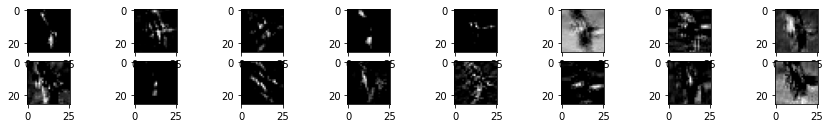




1/1 [==============================] - 0s 29ms/step
cat


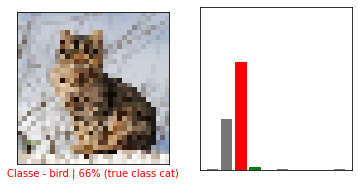

Classe - bird        | Confiança - 66.227
Classe - automobile  | Confiança - 30.893
Classe - cat         | Confiança - 1.882
Classe - truck       | Confiança - 0.342
Classe - dog         | Confiança - 0.306
Classe - airplane    | Confiança - 0.276
Classe - frog        | Confiança - 0.072
Classe - ship        | Confiança - 0.002
Classe - deer        | Confiança - 0.001
Classe - horse       | Confiança - 0.0  
1/1 [==============================] - 0s 61ms/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
_______________________________________________________

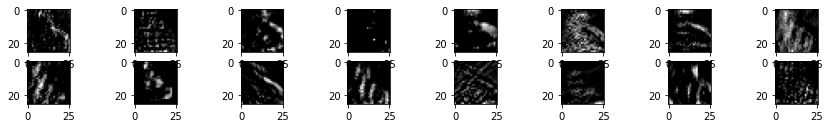




1/1 [==============================] - 0s 28ms/step
deer


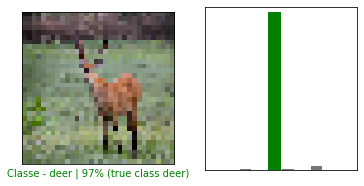

Classe - deer        | Confiança - 96.908
Classe - horse       | Confiança - 2.178
Classe - dog         | Confiança - 0.663
Classe - bird        | Confiança - 0.197
Classe - airplane    | Confiança - 0.03 
Classe - cat         | Confiança - 0.012
Classe - automobile  | Confiança - 0.005
Classe - ship        | Confiança - 0.005
Classe - frog        | Confiança - 0.003
Classe - truck       | Confiança - 0.0  
1/1 [==============================] - 0s 61ms/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
________________________________________________________

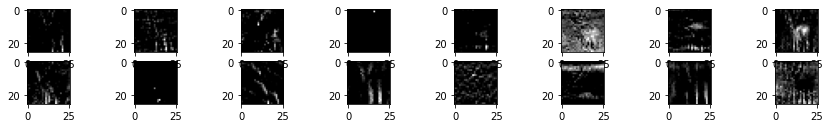




1/1 [==============================] - 0s 28ms/step
dog


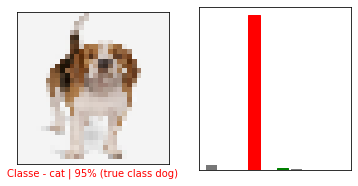

Classe - cat         | Confiança - 95.081
Classe - airplane    | Confiança - 2.95 
Classe - dog         | Confiança - 1.277
Classe - frog        | Confiança - 0.688
Classe - automobile  | Confiança - 0.003
Classe - bird        | Confiança - 0.001
Classe - deer        | Confiança - 0.0  
Classe - horse       | Confiança - 0.0  
Classe - ship        | Confiança - 0.0  
Classe - truck       | Confiança - 0.0  
1/1 [==============================] - 0s 62ms/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
________________________________________________________

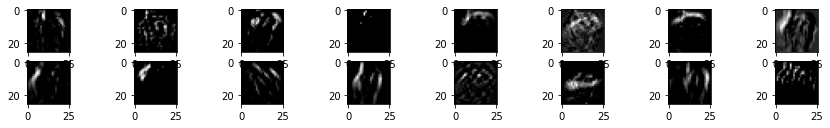




1/1 [==============================] - 0s 28ms/step
frog


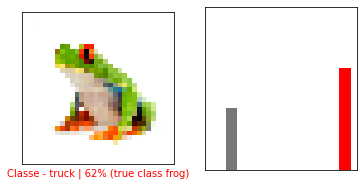

Classe - truck       | Confiança - 62.144
Classe - automobile  | Confiança - 37.853
Classe - airplane    | Confiança - 0.002
Classe - frog        | Confiança - 0.001
Classe - bird        | Confiança - 0.0  
Classe - cat         | Confiança - 0.0  
Classe - deer        | Confiança - 0.0  
Classe - dog         | Confiança - 0.0  
Classe - horse       | Confiança - 0.0  
Classe - ship        | Confiança - 0.0  
1/1 [==============================] - 0s 61ms/step
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
_______________________________________________________

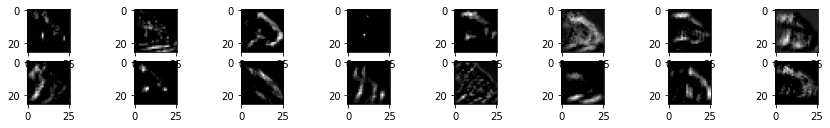




1/1 [==============================] - 0s 28ms/step
horse


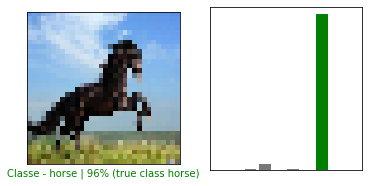

Classe - horse       | Confiança - 95.605
Classe - cat         | Confiança - 3.541
Classe - bird        | Confiança - 0.551
Classe - dog         | Confiança - 0.296
Classe - truck       | Confiança - 0.005
Classe - airplane    | Confiança - 0.002
Classe - automobile  | Confiança - 0.0  
Classe - deer        | Confiança - 0.0  
Classe - frog        | Confiança - 0.0  
Classe - ship        | Confiança - 0.0  
1/1 [==============================] - 0s 60ms/step
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
________________________________________________________

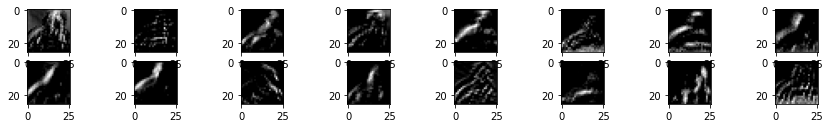




1/1 [==============================] - 0s 29ms/step
ship


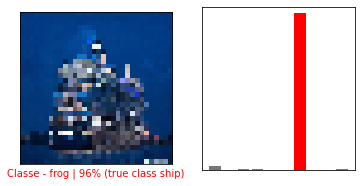

Classe - frog        | Confiança - 96.344
Classe - airplane    | Confiança - 2.053
Classe - cat         | Confiança - 0.737
Classe - bird        | Confiança - 0.348
Classe - truck       | Confiança - 0.279
Classe - automobile  | Confiança - 0.147
Classe - horse       | Confiança - 0.054
Classe - dog         | Confiança - 0.036
Classe - deer        | Confiança - 0.001
Classe - ship        | Confiança - 0.0  
1/1 [==============================] - 0s 61ms/step
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
________________________________________________________

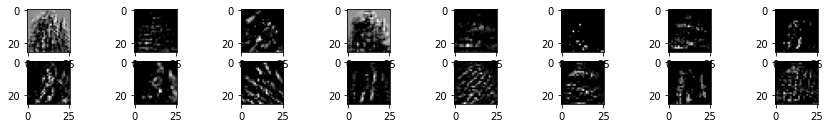




1/1 [==============================] - 0s 28ms/step
truck


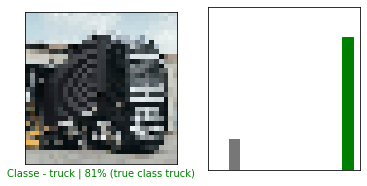

Classe - truck       | Confiança - 81.411
Classe - automobile  | Confiança - 18.563
Classe - frog        | Confiança - 0.024
Classe - airplane    | Confiança - 0.002
Classe - bird        | Confiança - 0.0  
Classe - cat         | Confiança - 0.0  
Classe - deer        | Confiança - 0.0  
Classe - dog         | Confiança - 0.0  
Classe - horse       | Confiança - 0.0  
Classe - ship        | Confiança - 0.0  
1/1 [==============================] - 0s 60ms/step
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        2368      
                                                                 
Total params: 2,368
Trainable params: 2,368
Non-trainable params: 0
_______________________________________________________

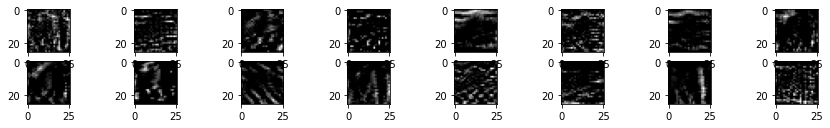

In [5]:
for category in CATEGORIES:

    true_label_num = CATEGORIES.index (category)
    
    DIR = TEST2_DIR+'/previsao '+'(' + category + ').'+formato
    
    xp, Xp = prepare(DIR)

    Xp=np.array(Xp/255.0)
       
    prediction = model.predict( Xp )
    
    prev = prediction[0]

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)

    plot_image(prediction[0], true_label_num, xp)
    plt.subplot(1,2,2)
    plot_value_array(prediction[0],  true_label_num)
    plt.show()
    
    infos = []
    
    for i in range( len(prev) ):
        
        infos.append([str(CATEGORIES[i]), np.round(prev[i]*100, 3)])
        
        #print( 'Classe - {} | Confiança - {} %'.format(CATEGORIES[i], np.round(prev[i]*100, 2) ) )
    
    infos = sorted(infos[:], key=itemgetter(1), reverse = True)
    
    for i in range(len(prev)):
        
        print('Classe - {:<11} | Confiança - {:<5}'.format(infos[i][0], infos[i][1]))
        
        #print( infos[i][0], infos[i][1] )
    
    #print(  np.flip(np.sort(infos, axis=0,), axis=0)   )
    
    inp = model.inputs 
    
    k=0
    '''
    for layer in model.layers:
        if 'conv' in layer.name: 
            fig= plt.figure(figsize=(15,15))
            out = layer.output
            #print(out)
            feature_map = Model(inputs= inp, outputs= out)
            f = feature_map.predict(Xp)
              
            feature_map.summary()
            
            print('Ativação na {}° camada'.format(k+1))

            for i in range(f.shape[3]):

                #p = f[:,:,:,i]
                
                p = f[0,:,:,i]
                
                #print(p.shape)
                #print(p.shape[2])
                
                ax = fig.add_subplot(16,8,i+1)
                ax.imshow(p, cmap='gray')

            plt.show()
        k=k+1
    '''
    print('\n\n')